## [Load image data](https://huggingface.co/docs/datasets/main/en/image_load)

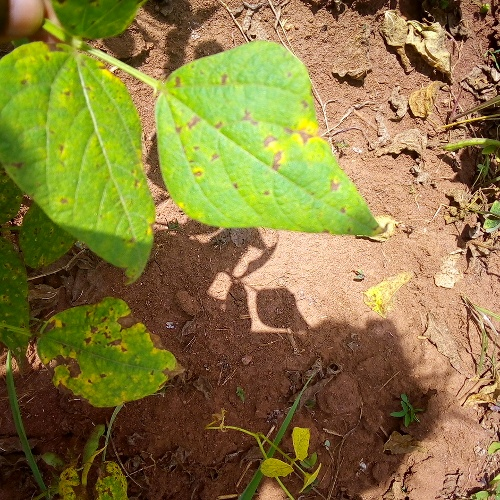

In [2]:
from datasets import load_dataset

dataset = load_dataset("beans", split="train")
dataset[0]["image"]

In [3]:
from datasets import load_dataset

dataset = load_dataset("imagefolder", data_dir="data/pokemon")
print(dataset)
dataset["train"][0]

DatasetDict({
    train: Dataset({
        features: ['image'],
        num_rows: 37
    })
})


{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=540x694>}

In [4]:
# `ImageFolder`を用いず、パスをいきなり指定しても読み込める
from datasets import load_dataset

dataset = load_dataset("data/pokemon")
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['image'],
        num_rows: 37
    })
})


## [Create an image dataset](https://huggingface.co/docs/datasets/main/en/image_dataset)

In [5]:
# フォルダが `区分`/`クラス`の形式である場合、ImageFolderは自動でラベルを付与する
# ただし`drop_label=False`を指定した場合。要するに、デフォルトではmetadata.csvなどを迎えられるように、フォルダ構造のラベルは無視される。
import os
from datasets import load_dataset

for root, dirs, files in os.walk("data/animal"):
    print(root, dirs, files)

dataset = load_dataset("imagefolder", data_dir="data/animal", drop_labels=False )
print(dataset)

data/animal ['train'] []
data/animal\train ['dog'] []
data/animal\train\dog [] ['Golden_Retriever_Dukedestiny01_drvd.jpg', 'metadata.csv']
DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 1
    })
})


In [6]:
# `metadata.csv`を用意することで、明示的にラベルを付与できる
import os
from datasets import load_dataset

for root, dirs, files in os.walk("data/animal"):
    print(root, dirs, files)

dataset = load_dataset("imagefolder", data_dir="data/animal")
print(dataset)
print(dataset["train"][0])

data/animal ['train'] []
data/animal\train ['dog'] []
data/animal\train\dog [] ['Golden_Retriever_Dukedestiny01_drvd.jpg', 'metadata.csv']
DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 1
    })
})
{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=652x515 at 0x2854ACB1B50>, 'label': 'dog'}


## [Object detection](https://huggingface.co/docs/datasets/object_detection)

新たにオブジェクトを検出するというより、学習用に既存のデータセットを利用する方法。

In [7]:
from datasets import load_dataset

ds = load_dataset("cppe-5") # Medical Personal Protective Equipment
example = ds['train'][0]
example

Generating test split: 100%|██████████| 29/29 [00:00<00:00, 2412.72 examples/s]


{'image_id': 15,
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=943x663>,
 'width': 943,
 'height': 663,
 'objects': {'id': [114, 115, 116, 117],
  'area': [3796, 1596, 152768, 81002],
  'bbox': [[302.0, 109.0, 73.0, 52.0],
   [810.0, 100.0, 57.0, 28.0],
   [160.0, 31.0, 248.0, 616.0],
   [741.0, 68.0, 202.0, 401.0]],
  'category': [4, 4, 0, 0]}}

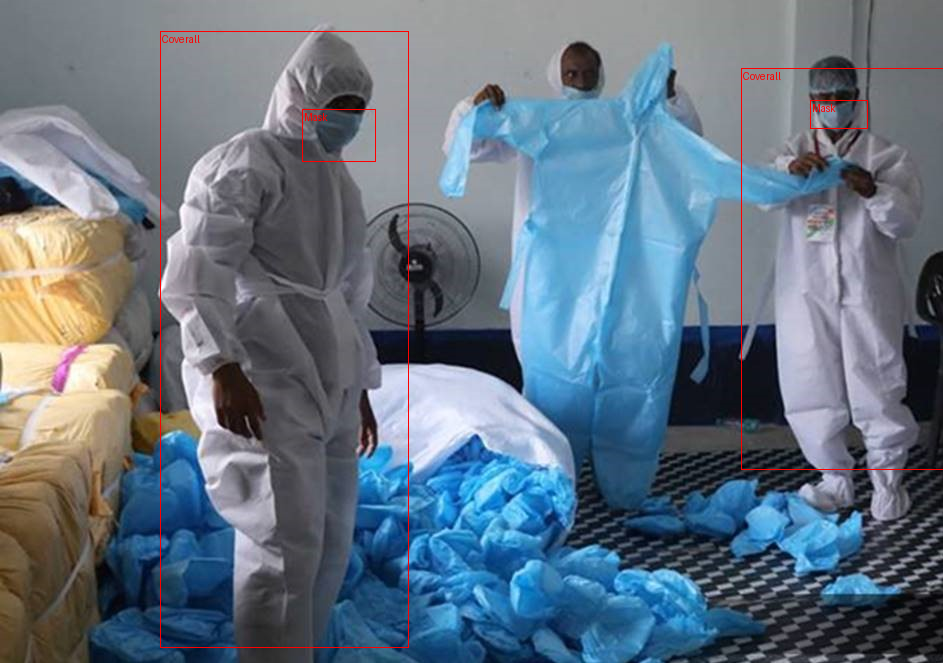

In [8]:
import torch
from torchvision.ops import box_convert
from torchvision.utils import draw_bounding_boxes
from torchvision.transforms.functional import pil_to_tensor, to_pil_image

categories = ds['train'].features['objects'].feature['category']

boxes_xywh = torch.tensor(example['objects']['bbox'])
boxes_xyxy = box_convert(boxes_xywh, 'xywh', 'xyxy')
labels = [categories.int2str(x) for x in example['objects']['category']]
to_pil_image(
    draw_bounding_boxes(
        pil_to_tensor(example['image']),
        boxes_xyxy,
        colors="red",
        labels=labels,
    )
)